### Experimenting with Shor's Algorithm to Break RSA

#### Experiment Overview

The goal of this experiment was to implement Shor's algorithm and test its ability to break RSA encryption by factoring the RSA modulus. This work explores the practical challenges and considerations involved in leveraging quantum computing for cryptographic analysis.

#### Introduction to Shor's Algorithm

Shor's algorithm is a quantum algorithm designed for factoring large integers efficiently. Unlike classical algorithms, which perform this task with exponential time complexity, Shor's algorithm utilizes quantum mechanics principles to achieve polynomial time complexity for this problem. Its efficiency is based on:

1. Quantum Fourier Transform (QFT): To determine periodicity.

2. Modular Exponentiation: To compute powers modulo a number.

3. Continued Fraction Expansion: To extract the period from the QFT result.


#### Motivation 

This experiment was motivated by the potential application of Shor's algorithm to break RSA encryption, which relies on the difficulty of factoring large composite numbers. Testing Shor's algorithm on RSA-encrypted numbers provides insights into its practicality and limitations.


#### Methodology

1. Implementation

    - The algorithm was implemented using Qiskit, an open-source quantum computing framework that provides tools for building and simulating quantum circuits. The implementation focused on accurately constructing the quantum circuit for Shor's algorithm and performing modular exponentiation within the quantum framework.
    - The implementation involved:

        - Getting a Token: Acquiring an IBM Quantum Experience API token to connect with IBM's RuntimeService for executing quantum circuits on actual quantum hardware.

        - Connecting to RuntimeService: Setting up the environment to access IBM's quantum resources and ensuring compatibility with the Qiskit runtime.

        - Building the Circuit: Constructing the quantum circuit for modular exponentiation and the Quantum Fourier Transform (QFT).

        - Simulations: Testing the algorithm on local simulators before deploying on IBM's quantum hardware.

2. Target

    - The RSA modulus , composed of two prime factors  and , was used as the target for factoring.

3. Base Selection

    - The base  for modular exponentiation was chosen randomly within the range. Key considerations included:

        - The greatest common divisor (GCD) of  and  should ideally be 1.

        - Behavior of the algorithm for specific base values.


### Key Steps in the Code:
1. Loading IBMQ Account: 
    - The IBM Quantum Experience API token is used to load the account and get the provider for IBM quantum hardware.

2. Running Shor’s Algorithm: 
    - The Shor object is used to factor a number N (in this case, the RSA modulus 15). The result shows the factors of N.


### Limitations

#### 1. Base Selection Challenges:

- Some base choices did not match the expected behavior of the algorithm, leading to inefficiencies or failures in factoring.

#### 2. Error Correction Considerations:

- Quantum error correction was not incorporated, which impacted the reliability of the results.

### Results

- The experiment demonstrated the feasibility of implementing Shor's algorithm using Qiskit.

- Factoring smaller RSA-moduli was successful in some cases, though inconsistencies arose due to the limitations noted above.

### SOME IMPORTS

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
# pylint: disable=invalid-name
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from math import gcd
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


### IBM Service Connection


In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
import os

token=os.environ.get('QUANTUM_TOKEN')
instance=os.environ.get('QUANTUM_INSTANCE')
# Authenticate with IBM Quantum Runtime using your API token
service = QiskitRuntimeService(channel="ibm_cloud", token=token, instance=instance)


## Getting Started



#### Local Simulation of Shor's Algorithm for Factoring 15

We will begin by **locally simulating the Shor circuit** to test its ability to factor the number 15. This will allow us to verify the implementation of the algorithm and ensure that the basic components of Shor's algorithm, such as **modular exponentiation** and the **Quantum Fourier Transform (QFT)**, are functioning as expected in a controlled environment before running on actual quantum hardware.


## Next Steps: Local Simulation of Shor's Algorithm for Factoring 15

We will begin by **locally simulating the Shor circuit** to test its ability to factor the number 15. This will allow us to verify the implementation of the algorithm and ensure that the basic components of Shor's algorithm, such as **modular exponentiation** and the **Quantum Fourier Transform (QFT)**, are functioning as expected in a controlled environment before running on actual quantum hardware.

### Steps for Simulation:

1. **Define the Problem:**
   - The goal is to factor the number **15** using Shor's algorithm. The number 15 is a relatively small number, making it an ideal candidate for initial testing.

2. **Create the Quantum Circuit:**
   - Build the quantum circuit that implements Shor's algorithm. This includes setting up the necessary qubits and gates for performing **modular exponentiation** and the **QFT**.
   
3. **Set Parameters:**
   - Select the base `a` for the modular exponentiation step. For the number 15, common choices for `a` include values like 2 or 4, but we will experiment with different bases to observe how they affect the results.
   
4. **Run the Simulation:**
   - Using **Qiskit**, we will simulate the Shor algorithm on a classical simulator. This allows us to test the algorithm without needing access to quantum hardware, providing a faster turnaround for debugging and fine-tuning.

5. **Analyze Results:**
   - After running the simulation, we will analyze the output to determine if the algorithm successfully factors the number 15. If the result is correct, we will proceed to test larger numbers and move towards using actual quantum hardware.

### Why This Step?

Simulating Shor's algorithm locally for factoring a small number like 15 will give us an initial understanding of how well the quantum circuit performs. It also allows us to identify any potential issues with the implementation before scaling to more complex numbers or running on actual quantum machines.


### Period Finding: c_amod15

#### Overview

The **Period Finding** step is a crucial part of Shor's algorithm, which aims to find the period `r` of a function. The function we use in this case is `c_amod15`, where `a` is a base number, and the function is defined as:

$$ f(x) = a^x \mod 15 $$

This step is essential for factoring large numbers, as it determines the period of the modular exponentiation function, which is then used to identify the factors of the number.

#### Function: `c_amod15`

The function `c_amod15` is defined as:

$$ f(x) = a^x \mod 15 $$

Where `a` is a randomly selected base, and `x` is the exponent that varies. The goal is to find the smallest integer `r` (the period) such that:

$$ a^r \mod 15 = 1 $$

This is the point where the modular exponentiation starts repeating itself, and identifying this period is key to breaking RSA encryption using Shor's algorithm.


In [3]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

### Quantum Fourier Transform (QFT) Dagger: qft_dagger(n)

#### Overview

The **Quantum Fourier Transform (QFT)** is a key component of Shor's algorithm, used to extract periodicity from the quantum state. The inverse of QFT, often called **QFT Dagger** or `qft_dagger`, is used to reverse the effects of QFT. This inverse transform is essential when you need to process the quantum state after applying the Fourier transform and obtain the required results for classical post-processing.

#### Function: `qft_dagger(n)`

The **QFT Dagger** performs the inverse operation of QFT. The purpose of this step is to reverse the quantum state transformation applied by QFT, allowing us to read out the information encoded in the quantum registers.

The QFT Dagger is implemented using quantum gates that undo the operations of the QFT, and it can be understood as performing a reverse order of operations compared to the QFT:

- **Phase Shift Gates (Inverse)**: These gates adjust the relative phases in the quantum state.
- **Hadamard Gates**: Reversed in order, applied from the highest to the lowest qubit.
- **Swap Gates**: The qubits are swapped in reverse order compared to the QFT.

#### Steps for `qft_dagger(n)`:

1. **Initial Quantum State:**
   - Before applying QFT Dagger, a quantum state has been transformed by QFT, and you need to reverse it to obtain meaningful results.
   
2. **Inverse of Phase Shifts:**
   - Apply the inverse of the phase shift gates used in QFT. The inverse of the controlled phase shift gate is applied to each qubit, starting from the highest qubit and working downwards.
   
3. **Hadamard Gates (In Reverse):**
   - Apply Hadamard gates in reverse order, starting from the highest qubit to the lowest. This is the reverse of the Hadamard gate application in the QFT.

4. **Swap the Qubits:**
   - After applying the inverse phase shifts and Hadamard gates, swap the qubits in the reverse order to undo the transformations made during QFT.

5. **Result:**
   - Once the QFT Dagger is applied, the quantum state will be transformed in such a way that the periodicity information needed for further processing or measurement can be extracted.


In [4]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):          
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

## Shor's Algorithm Quantum Circuit Implementation

The key operations in the quantum circuit are as follows:

### 1. Superposition of States
The algorithm starts by applying Hadamard gates to the qubits, creating a superposition of all possible states.

### 2. Modular Exponentiation
A controlled modular exponentiation is performed, where the quantum register is used to compute the value of the base raised to the power of the quantum register value modulo the number to factor, where the base is a randomly selected value, and the number to factor is \( N \).

### 3. Quantum Fourier Transform (QFT)
The Quantum Fourier Transform (QFT) is applied to the state of the quantum register. This step is crucial for extracting the periodicity from the quantum state created by the modular exponentiation.

### 4. Measurement and Classical Post-Processing
The final step involves measuring the quantum state and applying classical post-processing to extract the period, which is then used to find the factors of \( N \).

After measurement, the result is used to calculate the period of the modular exponentiation function. The period can then be used to find the factors of \( N \) by computing the greatest common divisor of the value raised to the power of half the period minus 1 and the number to factor, and similarly, the greatest common divisor of the value raised to the power of half the period plus 1 and the number to factor.

If a non-trivial factor divides the number, it is a factor of \( N \). If the period is not found, the algorithm is repeated with a different base.


In [6]:
import random
import math

N_COUNT = 5


N = 15
while True:
    a = random.randint(2, N - 1)
    if math.gcd(a, N) == 1:
        print(f"Scelto a = {a}")
        break

# Create QuantumCircuit with N_COUNT counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(N_COUNT + 4, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(N_COUNT)

# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q),
             [q] + [i+N_COUNT for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(N_COUNT), range(N_COUNT))

# Measure circuit
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw(fold=-1)  # -1 means 'do not fold'

Scelto a = 8


┌───┐                                                                            ┌───────┐┌─┐            
q_0: ┤ H ├───────■────────────────────────────────────────────────────────────────────┤0      ├┤M├────────────
     ├───┤       │                                                                    │       │└╥┘┌─┐         
q_1: ┤ H ├───────┼──────────────■─────────────────────────────────────────────────────┤1      ├─╫─┤M├─────────
     ├───┤       │              │                                                     │       │ ║ └╥┘┌─┐      
q_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────────────────────┤2 QFT† ├─╫──╫─┤M├──────
     ├───┤       │              │              │                                      │       │ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────────────────────┤3      ├─╫──╫──╫─┤M├───
     ├───┤       │              │              │              │                       │       │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■────────┤4      ├─╫──╫──╫──╫─┤M├
     ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐└───────┘ ║  ║  ║  ║ └╥┘
q_5: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├──────────╫──╫──╫──╫──╫─
     └───┘│             ││             ││             ││             ││              │          ║  ║  ║  ║  ║ 
q_6: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├──────────╫──╫──╫──╫──╫─
          │  8^1 mod 15 ││  8^2 mod 15 ││  8^4 mod 15 ││  8^8 mod 15 ││  8^16 mod 15 │          ║  ║  ║  ║  ║ 
q_7: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├──────────╫──╫──╫──╫──╫─
          │             ││             ││             ││             ││              │          ║  ║  ║  ║  ║ 
q_8: ─────┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├──────────╫──╫──╫──╫──╫─
          └─────────────┘└─────────────┘└─────────────┘└─────────────┘└──────────────┘          ║  ║  ║  ║  ║ 
c: 5/═══════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                                                                0  1  2  3  4

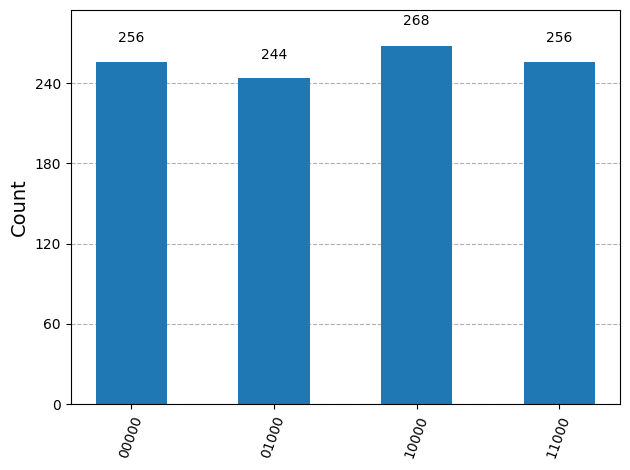

In [7]:
aer_sim = AerSimulator()
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()
plot_histogram(counts)

In [8]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**N_COUNT)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

         Register Output         Phase
0  11000(bin) =  24(dec)  24/32 = 0.75
1  01000(bin) =   8(dec)   8/32 = 0.25
2  10000(bin) =  16(dec)  16/32 = 0.50
3  00000(bin) =   0(dec)   0/32 = 0.00


In [9]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(N)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.75      3/4            4
1   0.25      1/4            4
2   0.50      1/2            2
3   0.00      0/1            1


In [10]:
import math
# --- Phase analysis and period extraction ---
print("\n--- Phase Analysis to find period 'r' ---")
candidate_periods = []
rows = []

for measured_phase_str in counts:
    # Convert binary measurement to decimal
    decimal_phase = int(measured_phase_str, 2) / (2**N_COUNT)
    frac = Fraction(decimal_phase).limit_denominator(N)
    s, r_candidate = frac.numerator, frac.denominator

    rows.append([measured_phase_str, decimal_phase, f"{s}/{r_candidate}", r_candidate])

    # Avoid duplicates
    if r_candidate not in candidate_periods:
        candidate_periods.append(r_candidate)

        # Check conditions for valid r
        if r_candidate % 2 == 0:
            r_half = r_candidate // 2
            val_mod_N = pow(a, r_half, N)
            if val_mod_N != (N - 1) and val_mod_N != 1:
                print(f"\n✅ Valid period candidate found: r = {r_candidate}")
                factor1 = math.gcd(pow(a, r_half) - 1, N)
                factor2 = math.gcd(pow(a, r_half) + 1, N)
                if factor1 not in [1, N]:
                    print(f" → Factor found: {factor1}")
                if factor2 not in [1, N]:
                    print(f" → Factor found: {factor2}")

                if factor1 not in [1, N] and factor2 not in [1, N]:
                    print("\n🎯 Both nontrivial factors found!")
                    break

# --- Show detailed table of measured phases ---
df = pd.DataFrame(rows, columns=["Binary Output", "Phase (decimal)", "Fraction (s/r)", "Candidate r"])
print("\n--- Detailed Phase Table ---")
print(df)

print("\n--- Shor Algorithm Completed ---")



--- Phase Analysis to find period 'r' ---

✅ Valid period candidate found: r = 4
 → Factor found: 3
 → Factor found: 5

🎯 Both nontrivial factors found!

--- Detailed Phase Table ---
  Binary Output  Phase (decimal) Fraction (s/r)  Candidate r
0         11000             0.75            3/4            4

--- Shor Algorithm Completed ---


### Running circuit on IBM

In [11]:
backends = service.backends()
for b in backends:
    print(b.name, b.configuration().n_qubits)


ibm_fez 156
ibm_marrakesh 156
ibm_torino 133


In [12]:
from qiskit import transpile
from qiskit_ibm_runtime import Sampler


# Choose an appropriate backend (real device)
backend = service.backend('ibm_fez')
print(backend)

# Transpile the circuit for the selected backend
compiled = transpile(qc, backend)
print("Circuit transpiled successfully.")

# Run the circuit on the backend
sampler = Sampler(mode=backend)
sim_result = sampler.run([compiled], shots=1024).result() #run of the transpiled circuit


# Wait for the result
sim_dist = sim_result[0].data.c.get_counts()
print("Measurement result:", sim_dist)


<IBMBackend('ibm_fez')>
Circuit transpiled successfully.
Measurement result: {'11110': 17, '01111': 37, '00100': 20, '10000': 45, '00011': 25, '01100': 34, '01101': 39, '11010': 36, '11100': 25, '10011': 29, '01000': 39, '11000': 36, '11101': 36, '11111': 28, '01011': 22, '00111': 48, '00010': 35, '10100': 28, '00101': 34, '01010': 23, '01001': 33, '11001': 58, '10001': 36, '10110': 31, '11011': 35, '00110': 24, '10010': 37, '10101': 23, '00000': 41, '00001': 33, '01110': 17, '10111': 20}


In [13]:
print('Transpiled circuit (2) depth: ', compiled.depth())
#Get the number of operators
print('Initial circuit operation count: ', compiled.count_ops())

Transpiled circuit (2) depth:  8813
Initial circuit operation count:  OrderedDict({'sx': 6444, 'rz': 4025, 'cz': 3309, 'measure': 5, 'x': 2})


In [14]:
def analyze_measurement_results_and_factorize(results, number_to_factor, a, n_qubit_phase):
    """
    Analyzes the measurement outcomes from Shor's algorithm and attempts to recover factors.
    """
    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

    print("\n--- Measurement Results (sorted by frequency) ---")
    for result, count in sorted_results:
        print(f"{result}: {count}")

    total_measurements = sum(count for _, count in sorted_results)
    print(f"\nTotal measurements: {total_measurements}")

    rows, candidate_rs, found_factors = [], [], []

    for measured_str, count in sorted_results:
        decimal = int(measured_str, 2)
        phase = decimal / (2 ** n_qubit_phase)
        frac = Fraction(phase).limit_denominator(number_to_factor)
        s, r = frac.numerator, frac.denominator
        rows.append([measured_str, decimal, f"{s}/{r}", r, count])

        # Try to recover nontrivial factors from candidate period r
        if r % 2 == 0:
            r_half = r // 2
            val_mod_N = pow(a, r_half, number_to_factor)
            if val_mod_N not in [1, number_to_factor - 1]:
                f1 = gcd(pow(a, r_half) - 1, number_to_factor)
                f2 = gcd(pow(a, r_half) + 1, number_to_factor)
                if f1 not in [1, number_to_factor] and f1 not in found_factors:
                    found_factors.append(f1)
                if f2 not in [1, number_to_factor] and f2 not in found_factors:
                    found_factors.append(f2)

    df = pd.DataFrame(rows, columns=["Binary", "Decimal", "Fraction", "Candidate r", "Count"])
    print("\n--- Phase Analysis ---")
    print(df)

    if found_factors:
        print(f"\n✅ Nontrivial factors found: {found_factors}")
    else:
        print("\n⚠️ No valid factors found from measured results.")

    return found_factors


# Example usage (replace with your actual parameters)
factors = analyze_measurement_results_and_factorize(sim_dist, N, a, N_COUNT)

if factors:
    print(f"\n🎯 Factors of {N} are likely: {factors}")
else:
    print(f"\nNo nontrivial factors found for {N}")



--- Measurement Results (sorted by frequency) ---
11001: 58
00111: 48
10000: 45
00000: 41
01101: 39
01000: 39
01111: 37
10010: 37
11010: 36
11000: 36
11101: 36
10001: 36
00010: 35
11011: 35
01100: 34
00101: 34
01001: 33
00001: 33
10110: 31
10011: 29
11111: 28
10100: 28
00011: 25
11100: 25
00110: 24
01010: 23
10101: 23
01011: 22
00100: 20
10111: 20
11110: 17
01110: 17

Total measurements: 1024

--- Phase Analysis ---
   Binary  Decimal Fraction  Candidate r  Count
0   11001       25      7/9            9     58
1   00111        7      2/9            9     48
2   10000       16      1/2            2     45
3   00000        0      0/1            1     41
4   01101       13      2/5            5     39
5   01000        8      1/4            4     39
6   01111       15     7/15           15     37
7   10010       18      5/9            9     37
8   11010       26     9/11           11     36
9   11000       24      3/4            4     36
10  11101       29    10/11           11     36
11 